In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = "../out/mushrooms/random_forest_classifier.csv"
df = pd.read_csv(path)

In [4]:
small_forest = df[(df["n_trees"] >= 10) & (df["n_trees"] <= 50)].round(2)
big_forest = df[(df["n_trees"] >= 100) & (df["n_trees"] <= 500)].round(2)

## Save plots

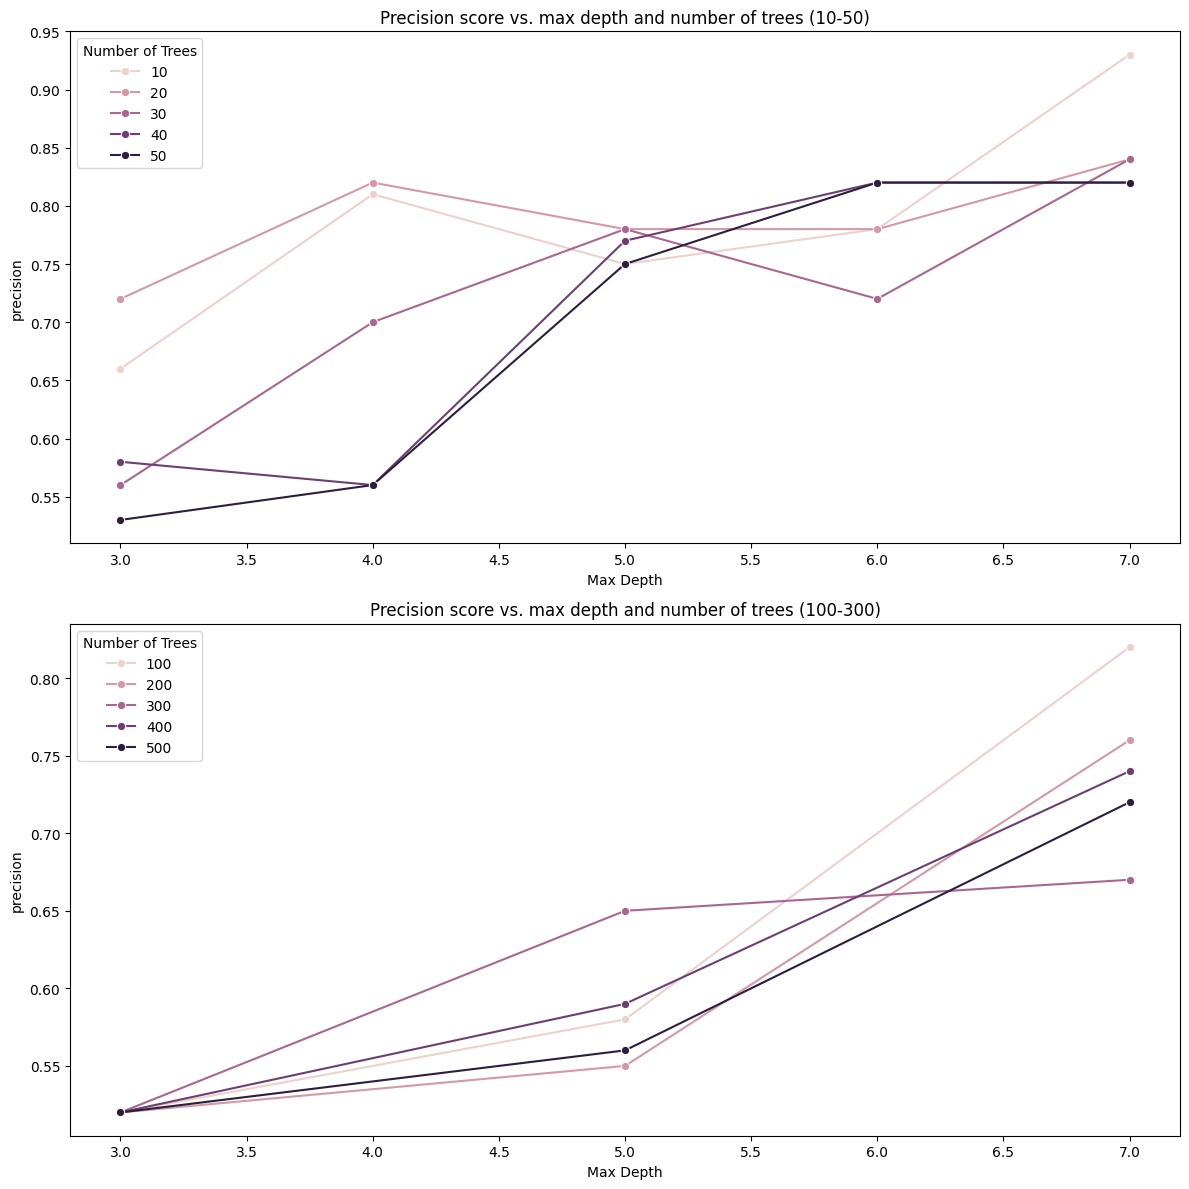

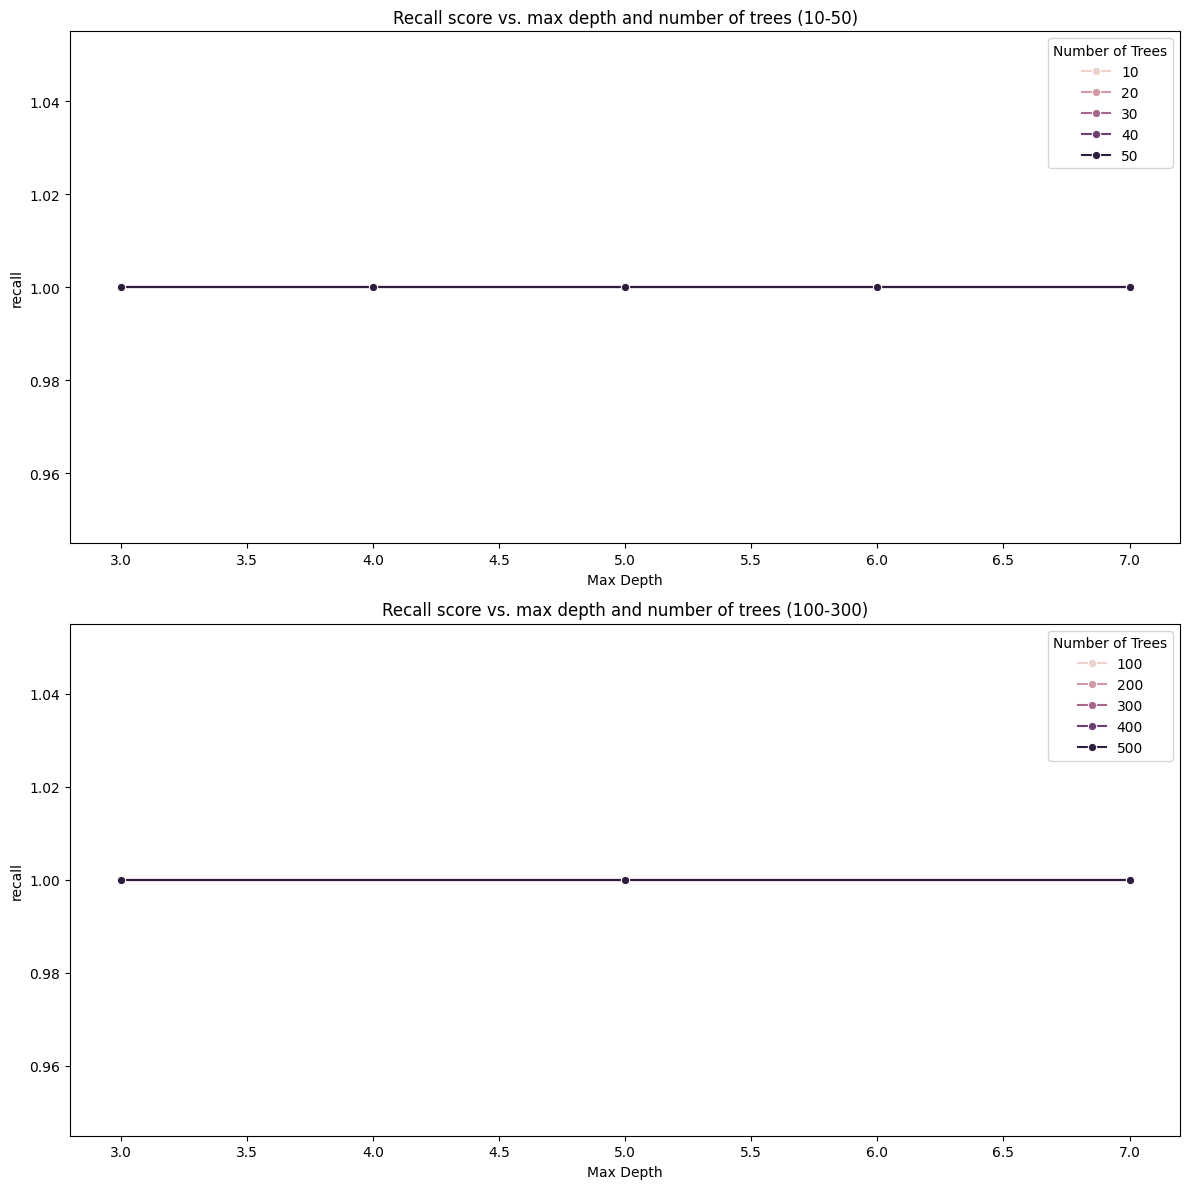

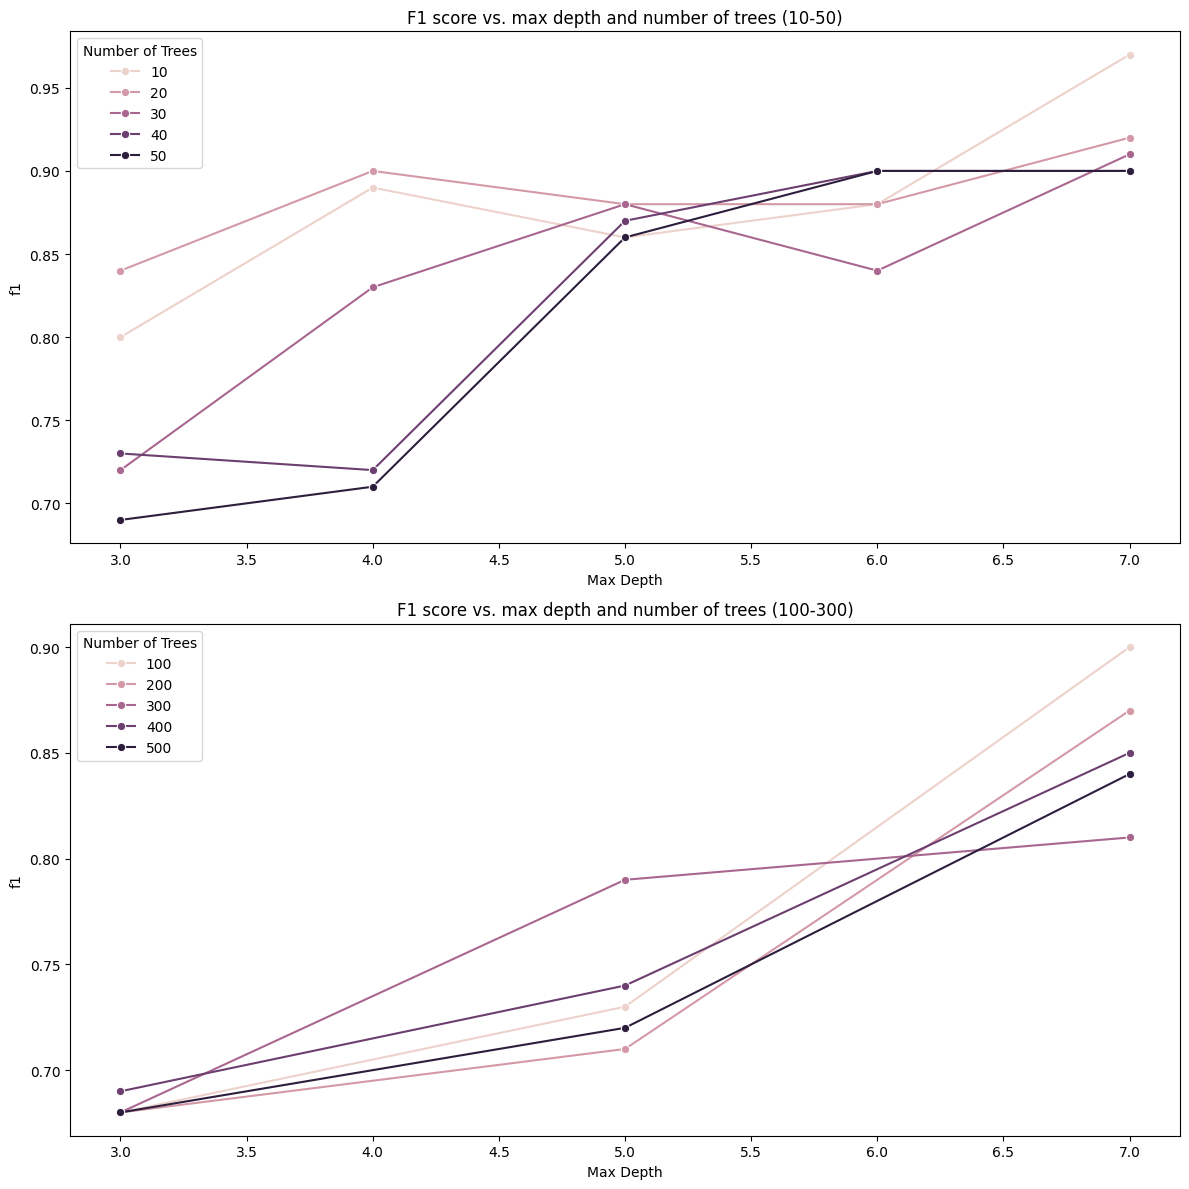

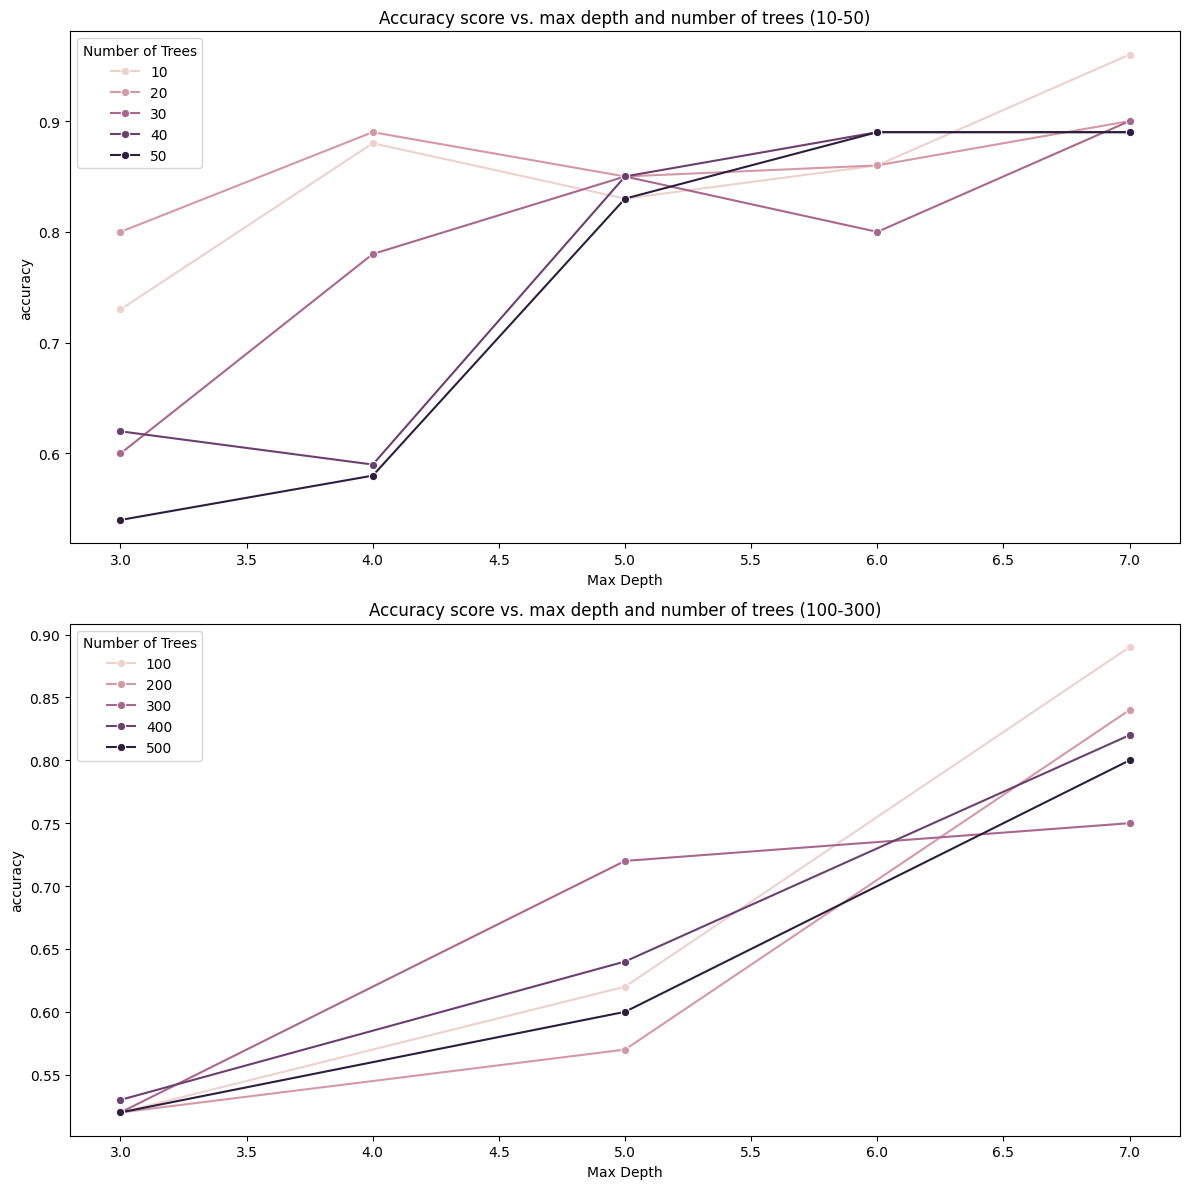

In [ ]:
scores = ["precision", "recall", "f1", "accuracy"]
labels = ["Precision", "Recall", "F1", "Accuracy"]

for score, label in zip(scores, labels): 
    fig, axes = plt.subplots(2, 1, figsize=(12, 12))

    sns.lineplot(ax=axes[0], data=small_forest, x="max_depth", y=score, hue="n_trees", marker="o")
    axes[0].set_title(f"{label} score vs. max depth and number of trees (10-50)")
    axes[0].set_xlabel("Max Depth")
    axes[0].set_ylabel(score)
    axes[0].legend(title="Number of Trees")

    sns.lineplot(ax=axes[1], data=big_forest, x="max_depth", y=score, hue="n_trees", marker="o")
    axes[1].set_title(f"{label} score vs. max depth and number of trees (100-500)")
    axes[1].set_xlabel("Max Depth")
    axes[1].set_ylabel(score)
    axes[1].legend(title="Number of Trees")

    plt.tight_layout()
    plt.savefig(f"../out/mushrooms/random_forest_classifier_{score}.png")

accuracy                                        
n_trees          10        20        30        40        50
max_depth                                                  
3          0.654777  0.691215  0.656760  0.635105  0.630178
4          0.756756  0.673025  0.666192  0.648560  0.666789
5          0.726055  0.701320  0.683708  0.669965  0.660745
6          0.801336  0.755967  0.695815  0.682207  0.669907
7          0.807226  0.749654  0.747267  0.719857  0.686615
8          0.825897  0.786168       NaN       NaN       NaN
10         0.841046  0.813366       NaN       NaN       NaN
12         0.846589  0.824588       NaN       NaN       NaN
14         0.858600  0.824299       NaN       NaN       NaN

In [142]:
path = "../out/mushrooms/tournament_forestt_classifier.csv"
df = pd.read_csv(path)

In [143]:

tournament_sizes = [2, 5, 10, 100]

for t_size in tournament_sizes:
    tournamnet_df= df[df["tournament_size"] == t_size].round(2)

    table = tournamnet_df.pivot_table(index='max_depth', columns='n_trees', values=['accuracy'])
    print(table)
    

          accuracy                  
n_trees        10    50    100   200
max_depth                           
3             0.56  0.48  0.47  0.45
5             0.56  0.50  0.46  0.45
7             0.55  0.52  0.49  0.47
12            0.59  0.50  0.50  0.49
          accuracy                   
n_trees        10     50    100   200
max_depth                            
3            0.515  0.460  0.45  0.45
5            0.575  0.470  0.45  0.45
7            0.545  0.475  0.46  0.46
12           0.630  0.500  0.49  0.46
          accuracy                  
n_trees        10    50    100   200
max_depth                           
3             0.57  0.46  0.45  0.45
5             0.52  0.47  0.46  0.45
7             0.61  0.49  0.46  0.46
12            0.63  0.53  0.48  0.49
          accuracy                  
n_trees        10    50    100   200
max_depth                           
3             0.65  0.48  0.49  0.47
5             0.68  0.56  0.49  0.54
7             0.70  0.64  0.53 

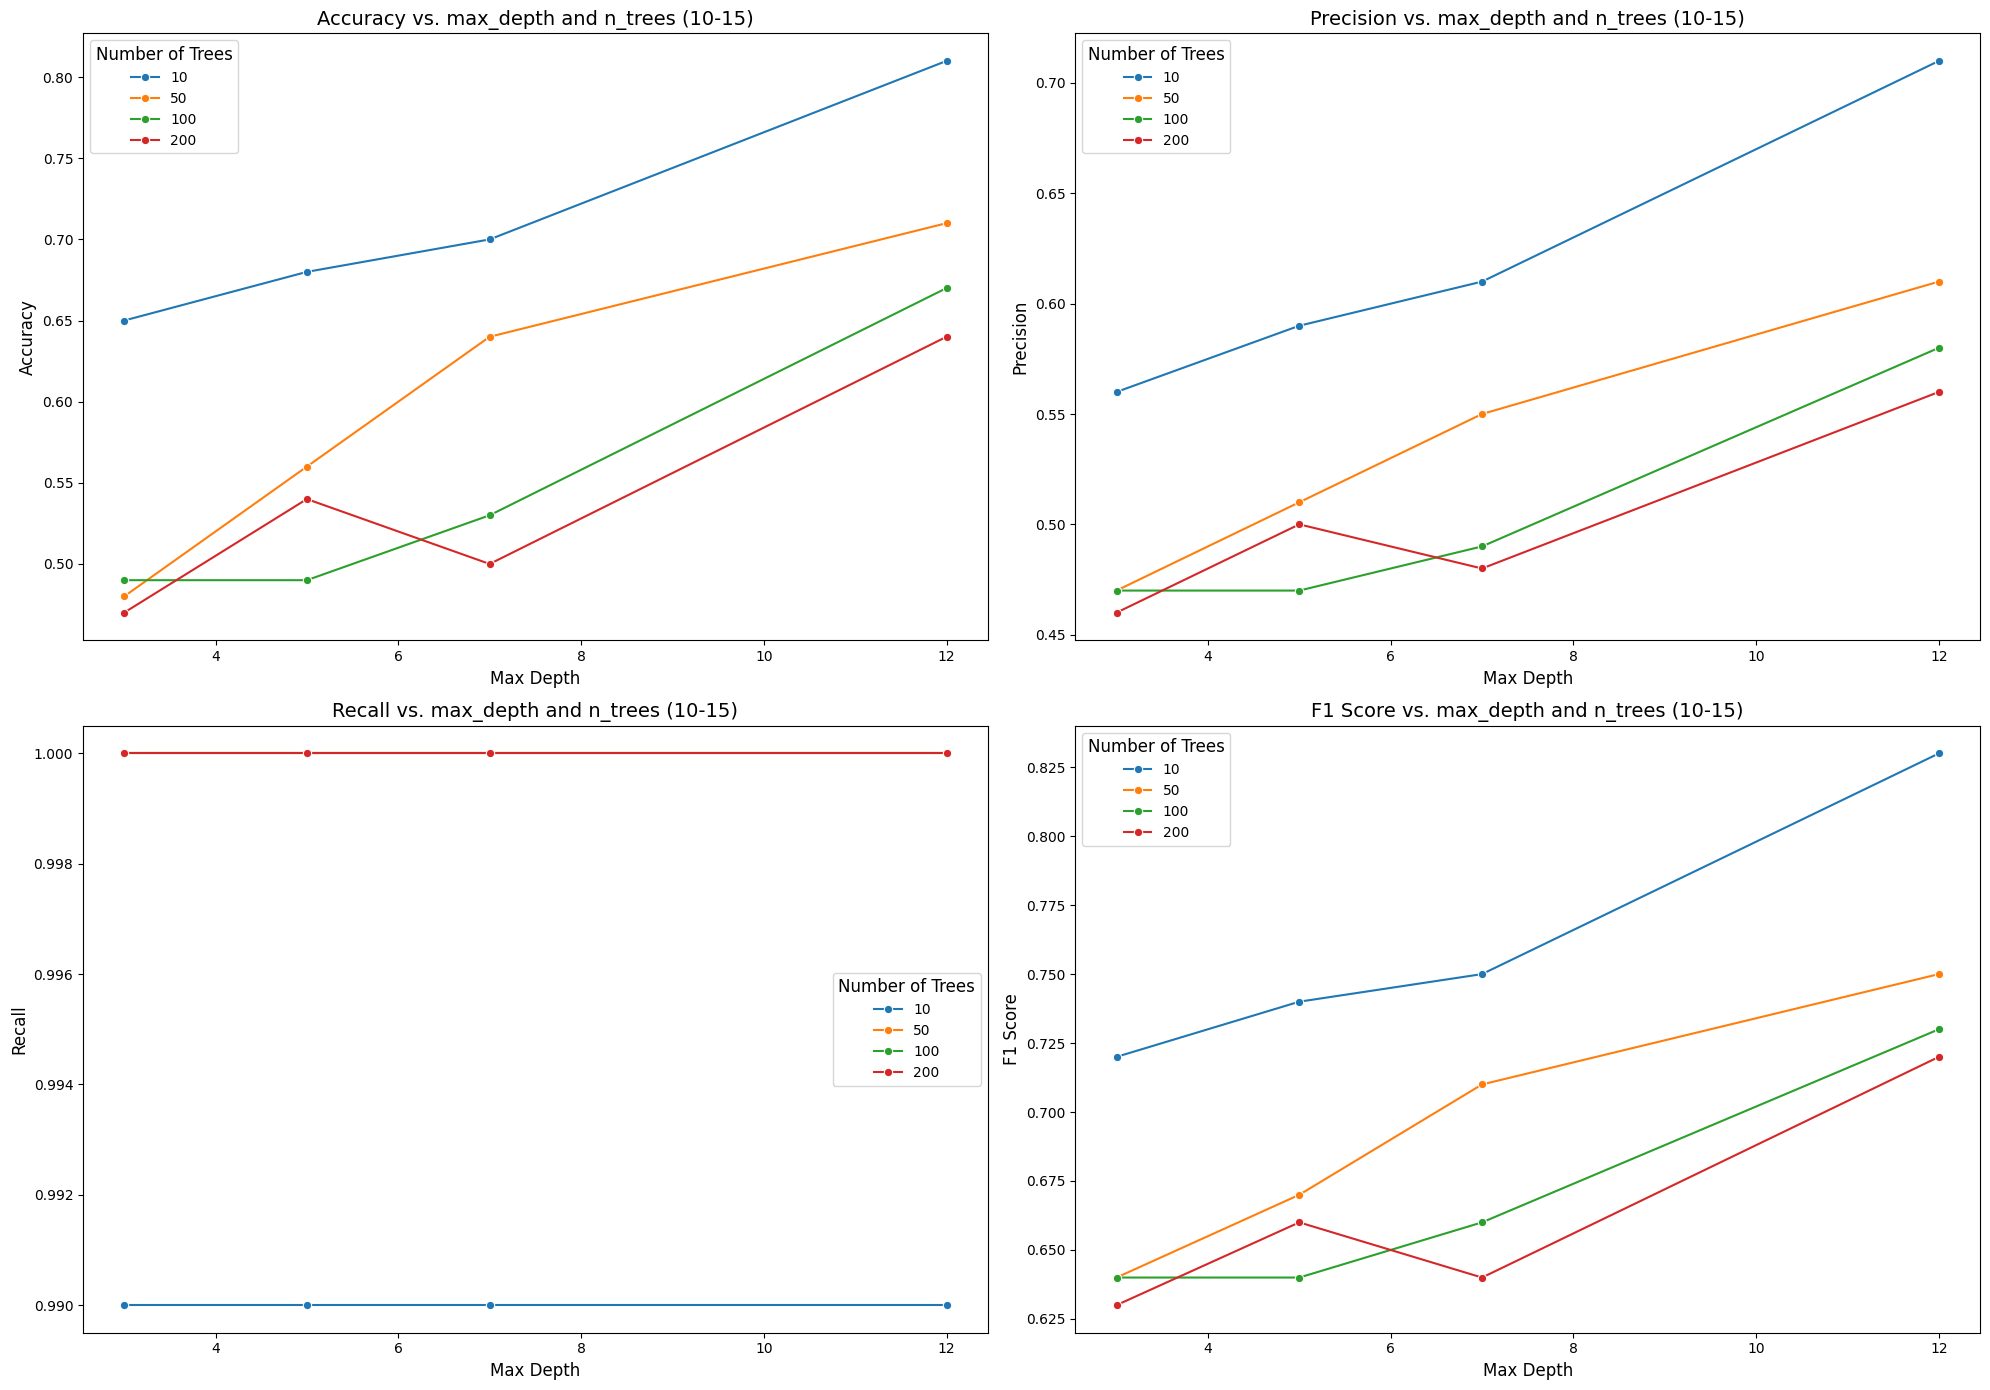

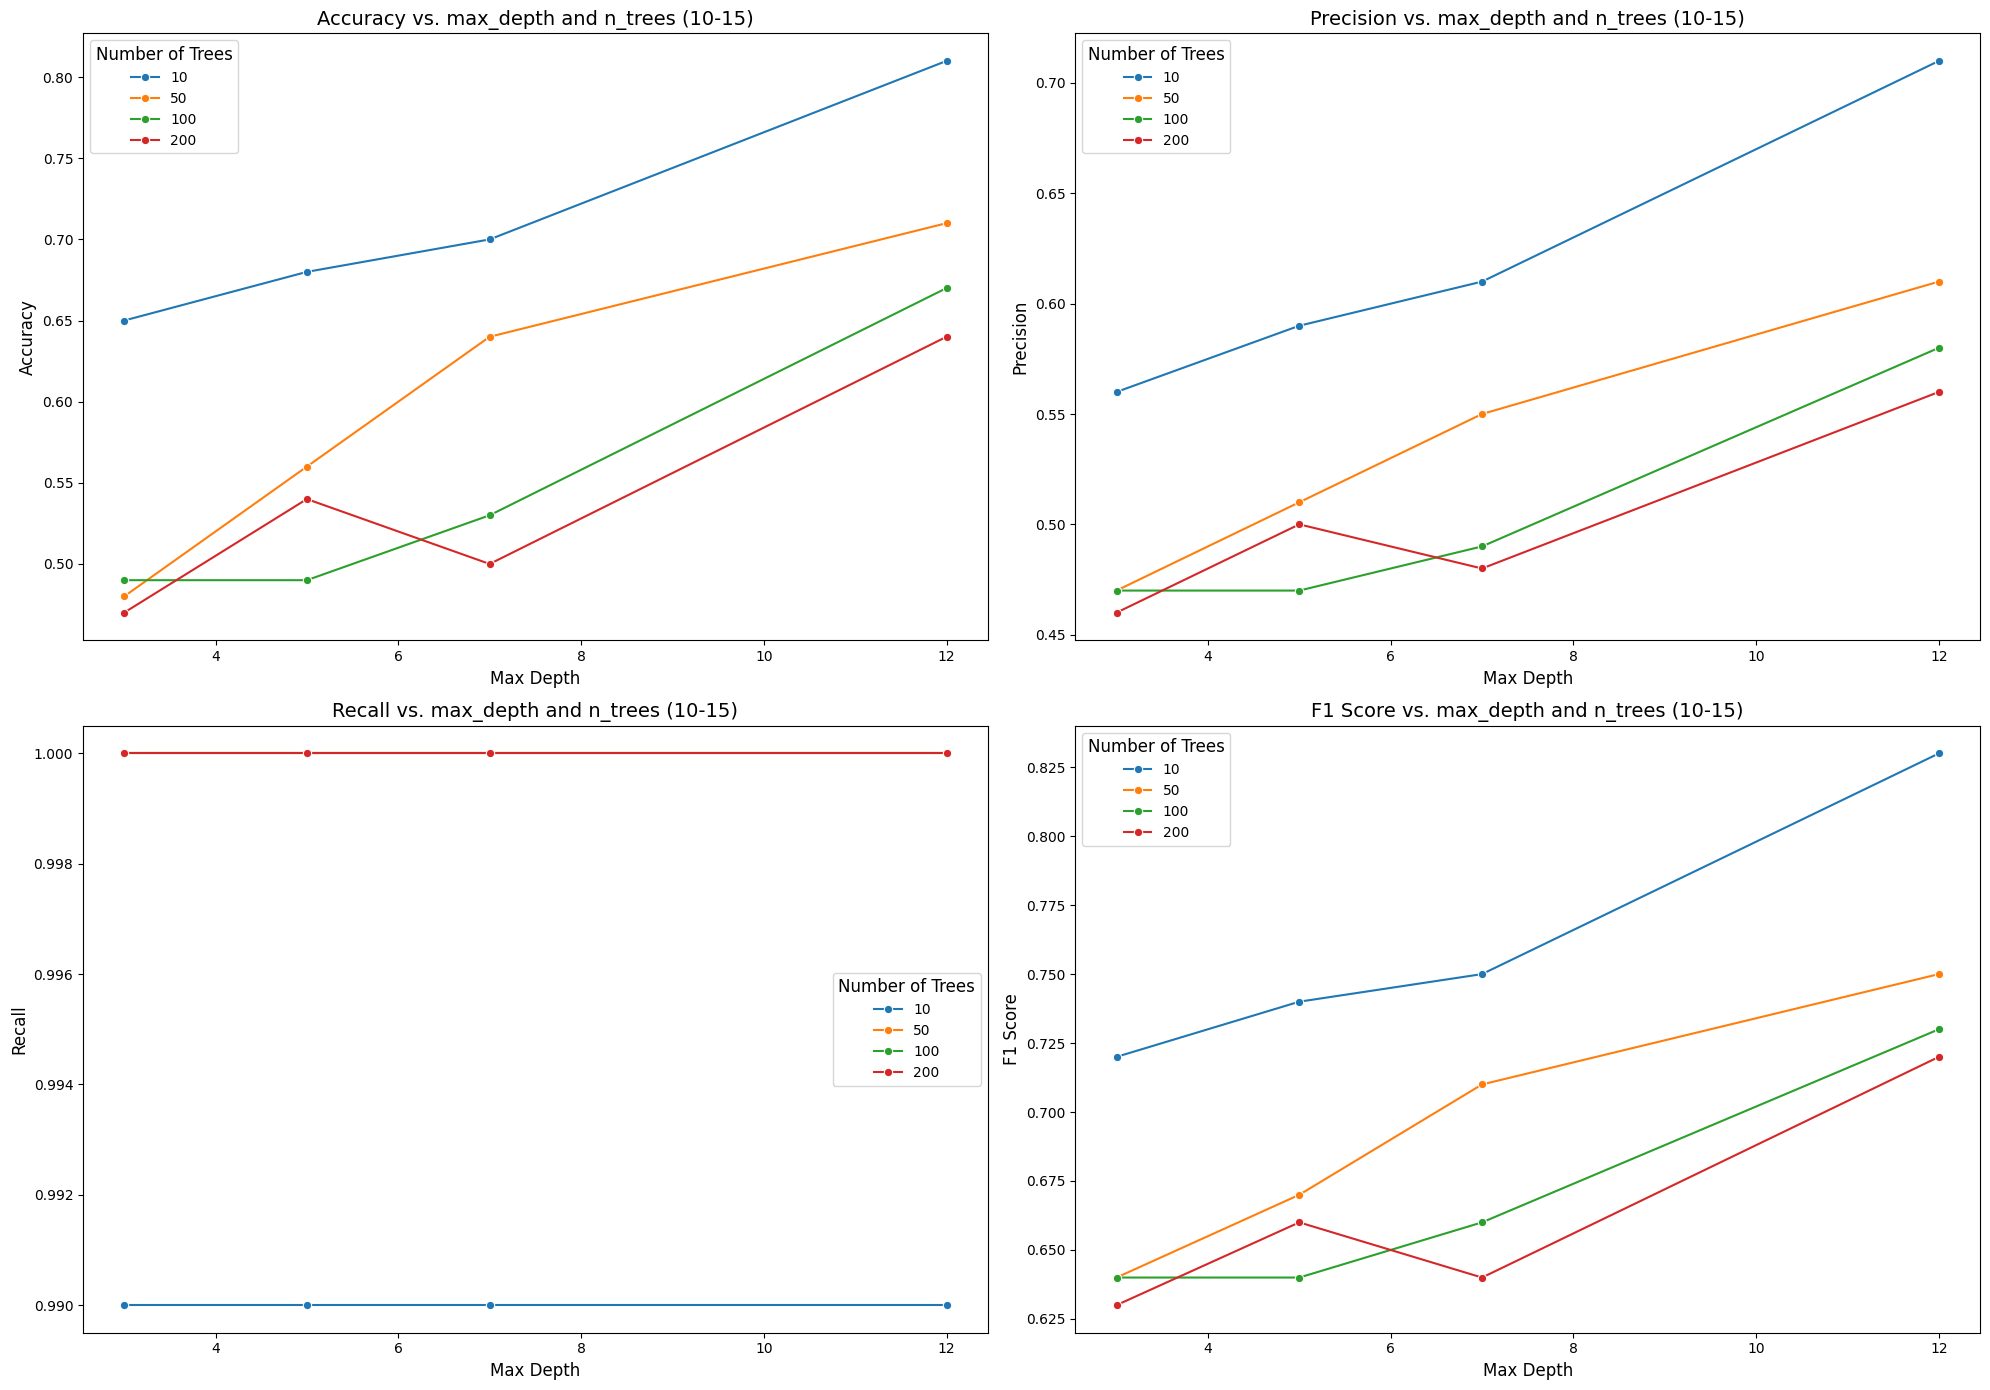

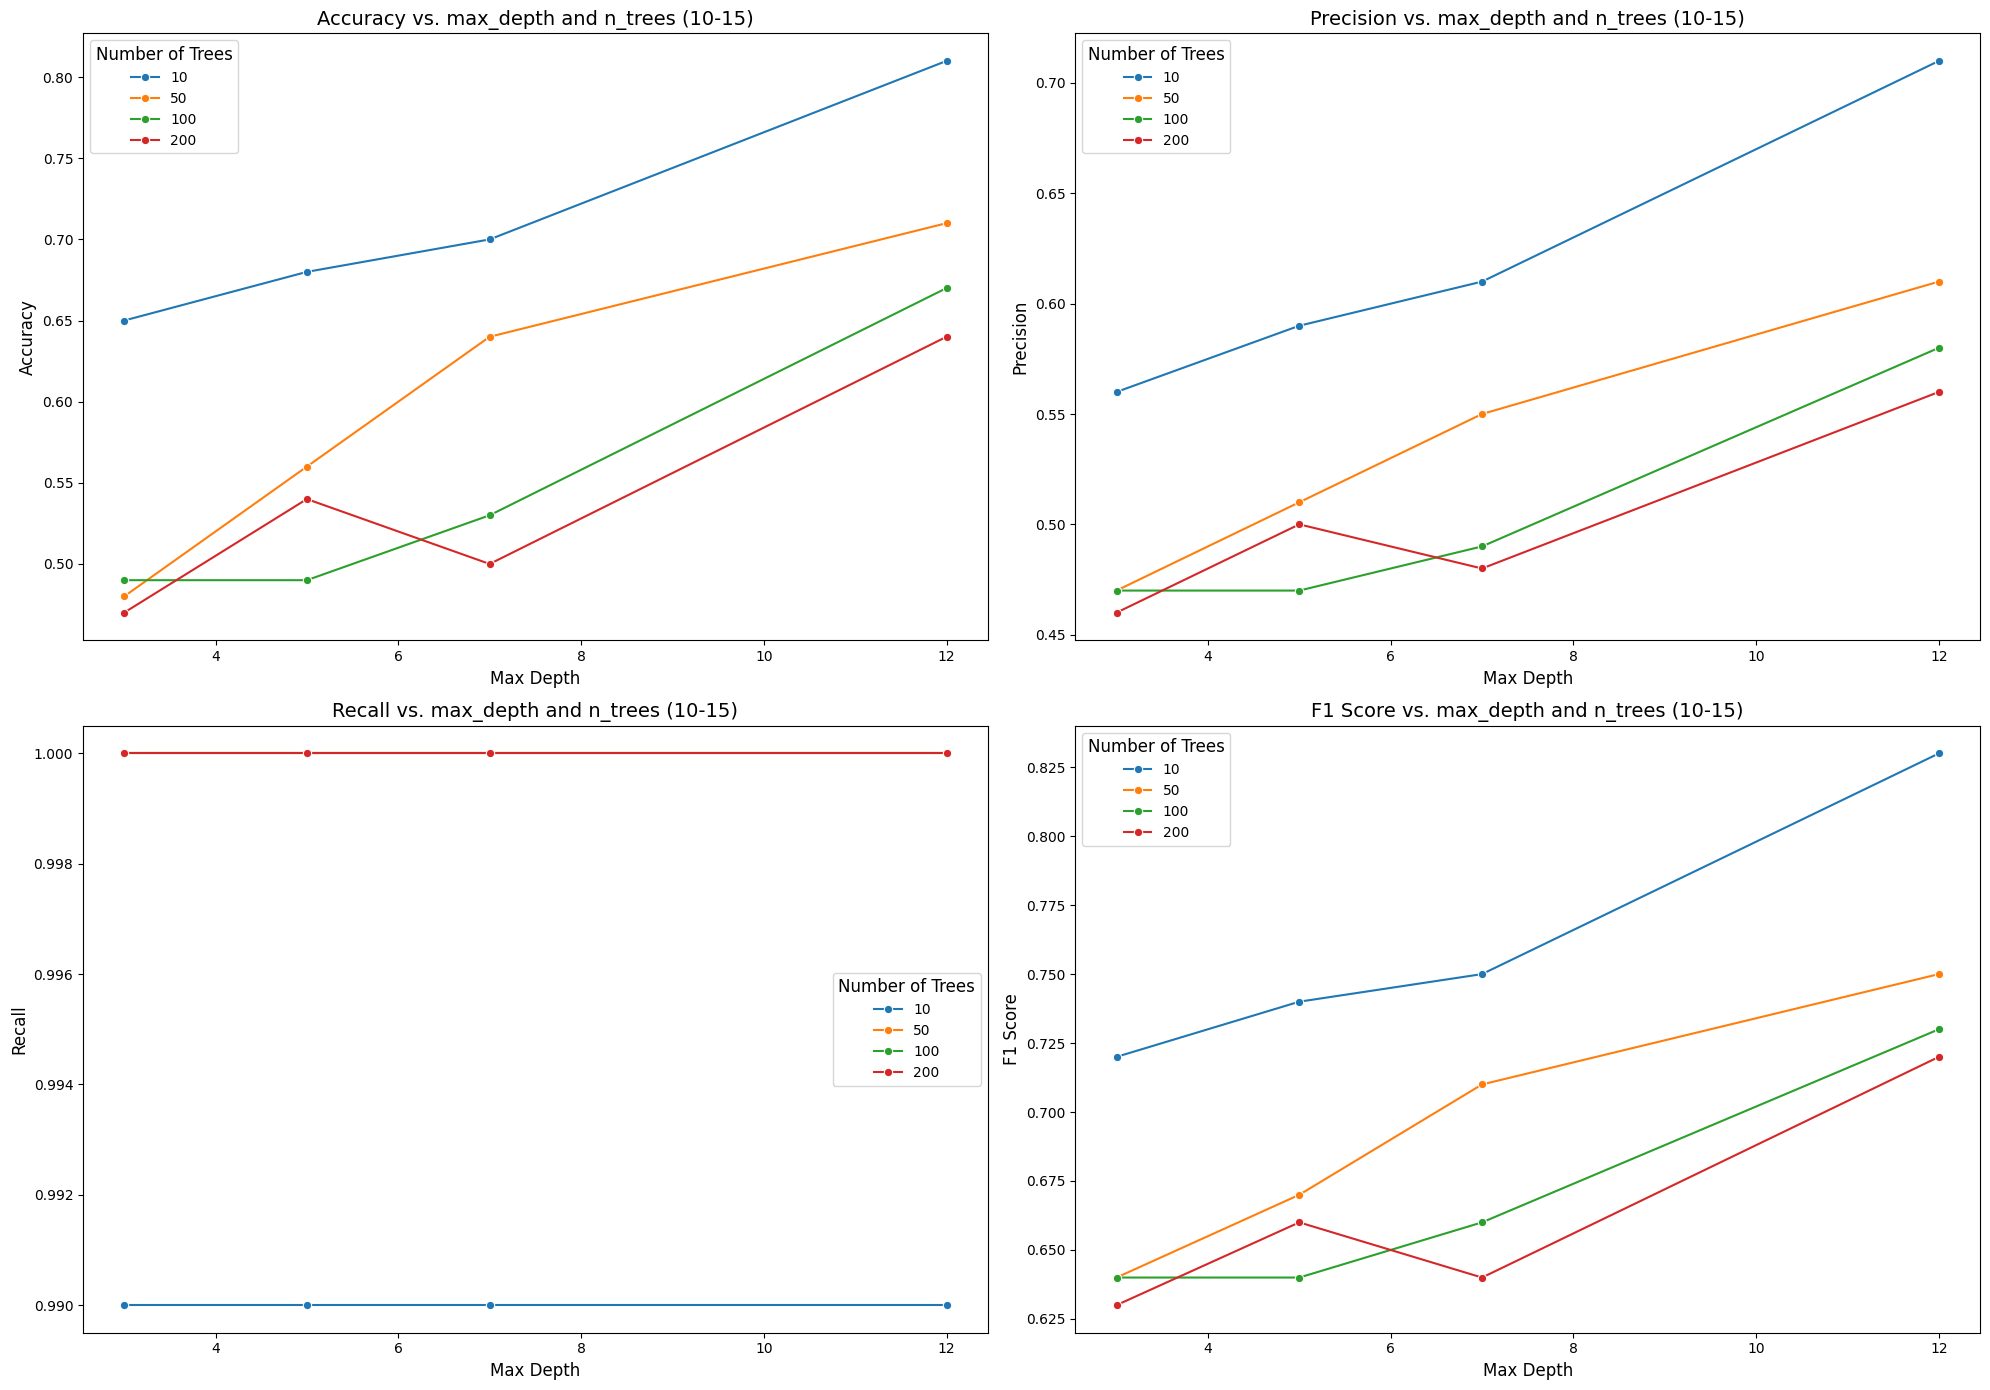

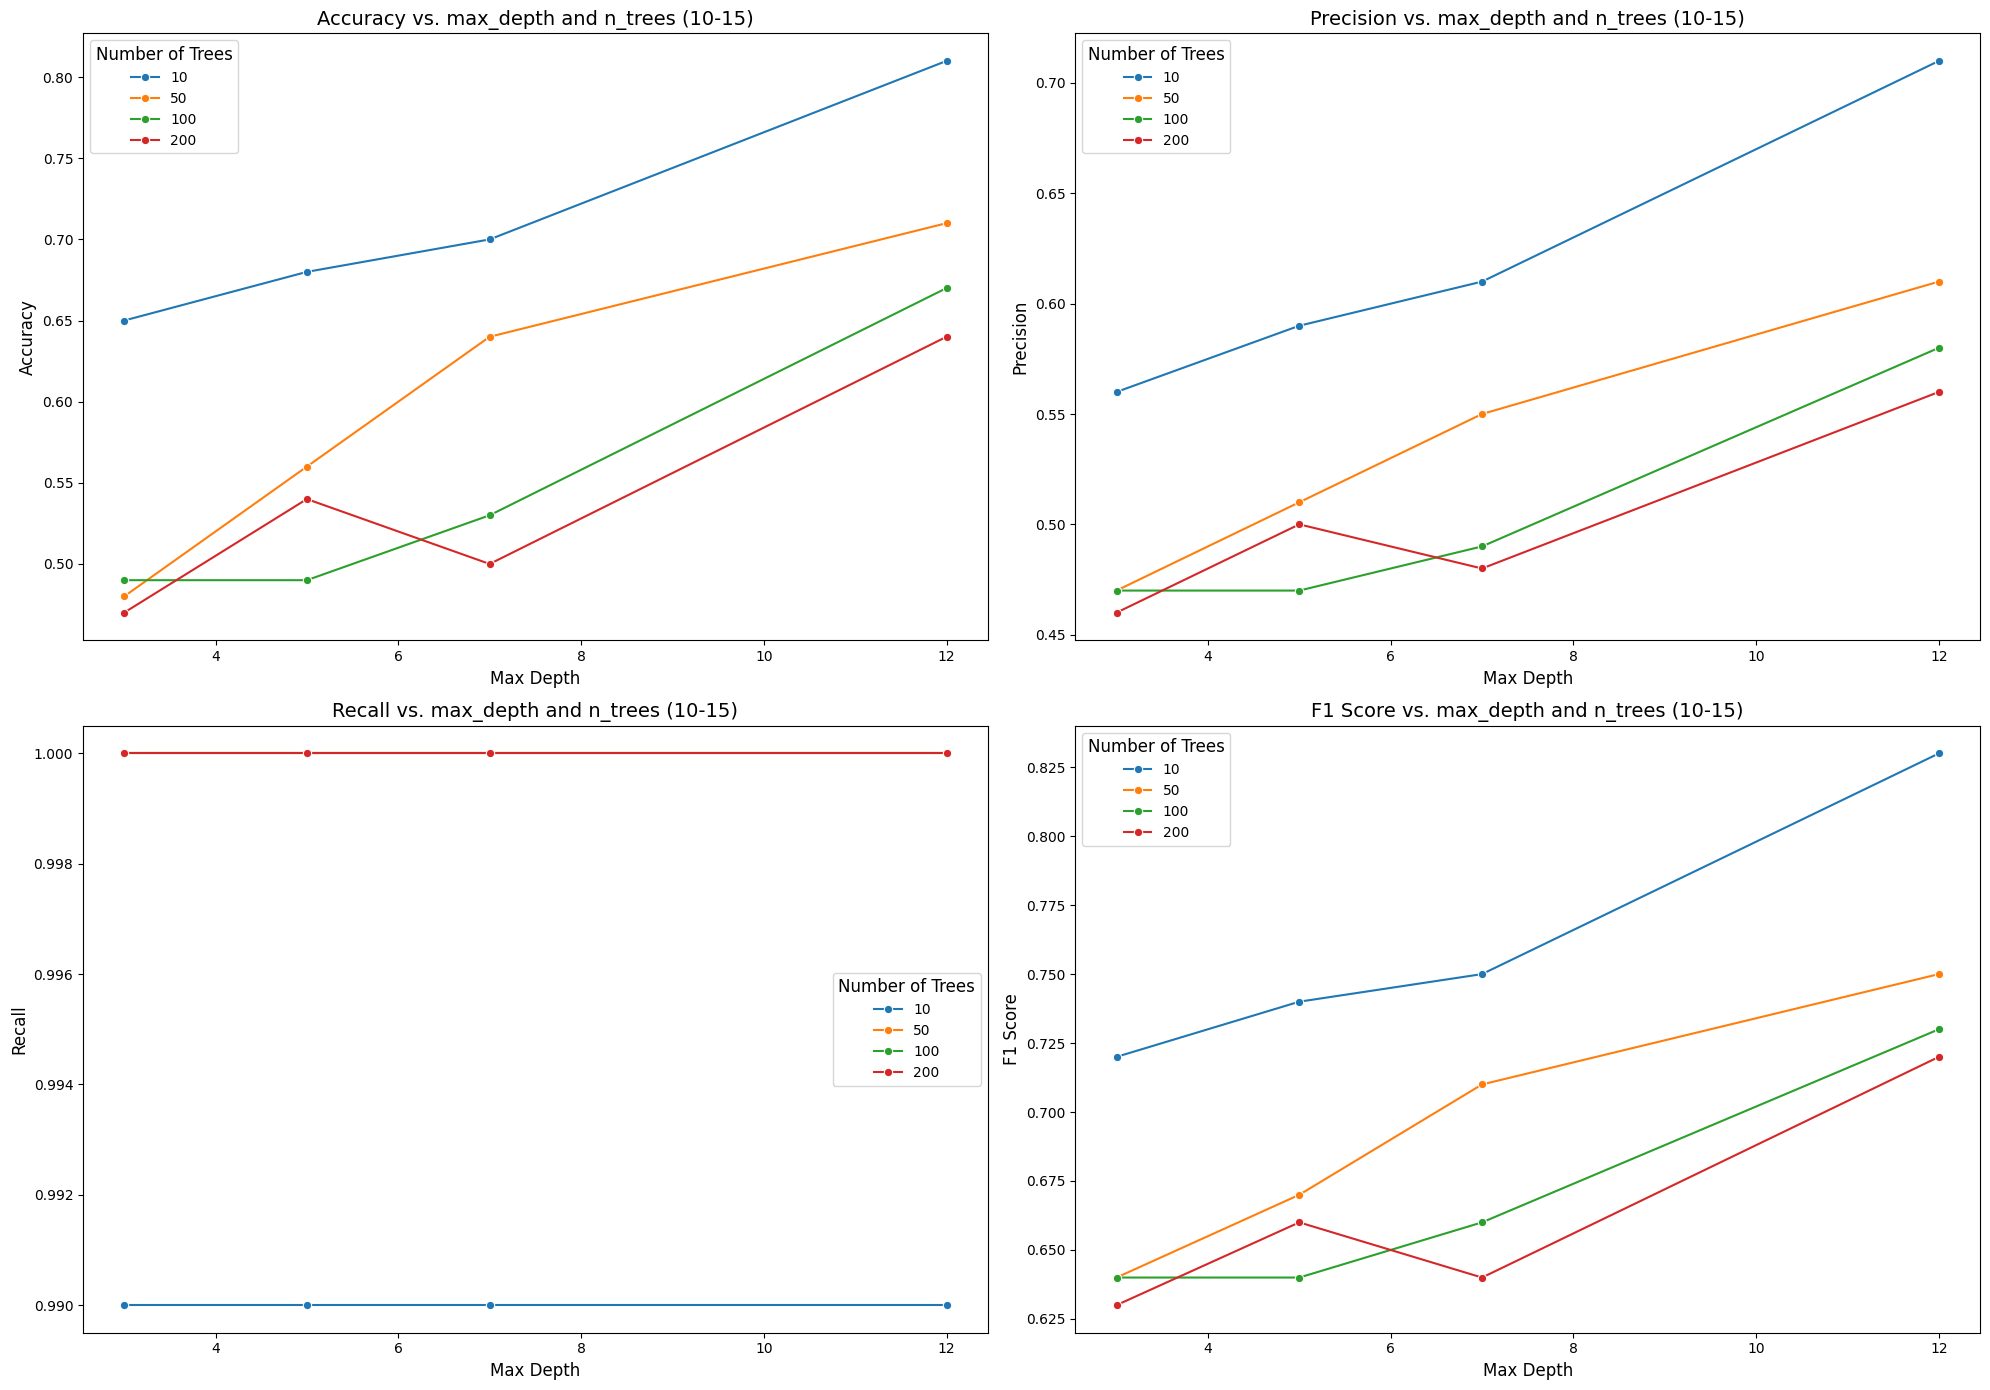

In [146]:
scores = ["precision", "recall", "f1", "accuracy"]
labels = ["Precision", "Recall", "F1", "Accuracy"]

for tournament in tournament_sizes:
    tournament_df = df[df["tournament_size"] == t_size].round(2)
    # Create the figure and axes with a larger size for better readability
    fig, axes = plt.subplots(2, 2, figsize=(20, 14))

    # Accuracy plot
    sns.lineplot(ax=axes[0, 0], data=tournament_df, x='max_depth', y='accuracy', hue='n_trees', marker='o', palette='tab10')
    axes[0, 0].set_title('Accuracy vs. max_depth and n_trees (10-15)', fontsize=14)
    axes[0, 0].set_xlabel('Max Depth', fontsize=12)
    axes[0, 0].set_ylabel('Accuracy', fontsize=12)
    axes[0, 0].legend(title='Number of Trees', fontsize=10, title_fontsize=12)

    # Precision plot
    sns.lineplot(ax=axes[0, 1], data=tournament_df, x='max_depth', y='precision', hue='n_trees', marker='o', palette='tab10')
    axes[0, 1].set_title('Precision vs. max_depth and n_trees (10-15)', fontsize=14)
    axes[0, 1].set_xlabel('Max Depth', fontsize=12)
    axes[0, 1].set_ylabel('Precision', fontsize=12)
    axes[0, 1].legend(title='Number of Trees', fontsize=10, title_fontsize=12)

    # Recall plot
    sns.lineplot(ax=axes[1, 0], data=tournament_df, x='max_depth', y='recall', hue='n_trees', marker='o', palette='tab10')
    axes[1, 0].set_title('Recall vs. max_depth and n_trees (10-15)', fontsize=14)
    axes[1, 0].set_xlabel('Max Depth', fontsize=12)
    axes[1, 0].set_ylabel('Recall', fontsize=12)
    axes[1, 0].legend(title='Number of Trees', fontsize=10, title_fontsize=12)

    # F1 Score plot
    sns.lineplot(ax=axes[1, 1], data=tournament_df, x='max_depth', y='f1', hue='n_trees', marker='o', palette='tab10')
    axes[1, 1].set_title('F1 Score vs. max_depth and n_trees (10-15)', fontsize=14)
    axes[1, 1].set_xlabel('Max Depth', fontsize=12)
    axes[1, 1].set_ylabel('F1 Score', fontsize=12)
    axes[1, 1].legend(title='Number of Trees', fontsize=10, title_fontsize=12)

    plt.tight_layout()
    plt.savefig(f"../out/airline_cs/tournament_{tournament}.png")